### Import Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import random

# Linear Regression without Normalization

In [10]:
# Load datasets
train_data = pd.read_csv('data_supervised_learning/train1', delimiter="\t", header=None)
test_data = pd.read_csv('data_supervised_learning/test1', delimiter="\t", header=None)
train_X = train_data[0].values
train_Y = train_data[1].values
test_X = test_data[0].values
test_Y = test_data[1].values

In [39]:
def linear_regression(learning_rate, features, labels, epoch):
    num_samples = features.shape[0]
    np.random.seed(42)
    W = np.random.normal(0, 0.01, 2)

    for i in range(epoch):
        #print("epoch is", i)

        for j in range(0, num_samples):

            # Get sample from data
            train_X_sample = features[j]
            train_Y_sample = labels[j]
            #print("\nSample is ", train_X_sample, train_Y_sample)

            # Calculate prediction for current weights
            prediction = W[0] + W[1] * train_X_sample
            #print("Prediction is", prediction)

            # Calculate difference of ground label and prediction
            difference = train_Y_sample - prediction
            #print("Difference is", difference)

            # Calculate gradients
            w1_gra = 2 * difference * (-1 * train_X_sample)
            w0_gra = 2 * difference * -1
            #print("Gradients are", w1_gra, w0_gra)

            W[0] -= learning_rate * w0_gra
            W[1] -= learning_rate * w1_gra
            #print("Updated weights are", W[1], W[0])

    return W

In [47]:
def plot_regression(features, labels, predictions, label_addition=""):

    plt.plot(features, predictions, label="predicted")
    plt.scatter(features, labels, s=10, color="r", label="actual")
    plt.legend(loc="upper left")
    plt.title('feature vs. label' + label_addition)
    plt.xlabel('feature')
    plt.ylabel('label')
    plt.show()

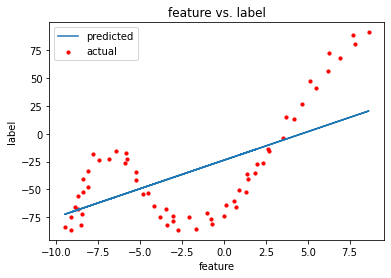

In [51]:
W = linear_regression(1e-3, train_X, train_Y, 2000)
predictions = W[1] * train_X  + W[0]
plot_regression(train_X, train_Y, predictions)

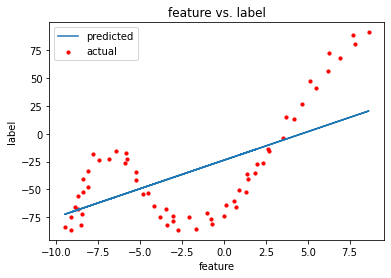

In [30]:
W[1] * train_X  + W[0]

array([-70.32134645, -69.3782342 , -66.78467557, -61.83333638,
       -54.05266045, -48.62976508, -43.44264783, -27.40973989,
       -17.03550533,  -9.96216359,  -4.77504628,   2.53407353,
         8.1927469 ,  15.50186671,  20.4532059 ,  16.2092009 ,
        11.49363972,   7.95696884,   4.18451991,   0.17629291,
        -2.41726572,  -5.71815853, -10.43371971, -11.84838803,
       -14.20616865, -16.32817115, -19.15750784, -16.79972727,
       -13.73461252, -20.10062008, -23.63729096, -27.64551795,
       -32.36107909, -37.78397445, -39.19864277, -41.32064533,
       -41.55642339, -45.09309426, -46.9793187 , -50.51598958,
       -50.51598958, -53.34532626, -58.76822163, -56.64621908,
       -63.71956082, -65.13422919, -65.37000726, -68.43512201,
       -68.19934394, -72.44334895, -67.49200976, -70.32134645,
       -67.2562317 , -66.78467557, -53.81688239, -39.19864277,
       -34.48308164, -28.82440821, -23.16573483, -20.80795427])

In [31]:
train_Y

array([-86.42335766, -65.98540146, -40.2919708 , -23.94160584,
       -26.27737226, -54.30656934, -74.74452555, -81.16788321,
       -51.97080292, -15.18248175,  14.59854015,  47.29927007,
        72.40875912,  88.75912409,  91.09489051,  80.58394161,
        68.32116788,  56.64233577,  41.45985401,  26.27737226,
        12.84671533,  -3.50364964, -13.43065693, -26.27737226,
       -35.03649635, -40.87591241, -50.2189781 , -36.20437956,
       -26.86131387, -65.98540146, -73.57664234, -76.49635036,
       -85.25547445, -86.42335766, -78.24817518, -81.75182482,
       -67.73722628, -64.81751825, -53.13868613, -42.04379562,
       -34.45255474, -22.77372263, -22.77372263, -15.76642336,
       -18.68613139, -33.86861314, -47.88321168, -56.05839416,
       -67.73722628, -83.50364964, -81.75182482, -74.74452555,
       -71.82481752, -52.55474453, -16.93430657, -74.16058394,
       -74.74452555, -71.24087591, -64.23357664, -60.72992701])